# Garment workers Productivity data

BY: Rasha Alharthi

In [1]:
# Importing all necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

%matplotlib inline 

# ML training and tuning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# Loading and saving models
import pickle

### About the dataset:

- date : Date in MM-DD-YYYY
- day : Day of the Week
- quarter : A portion of the month. A month was divided into four quarters
- department : Associated department with the instance
- teamno : Associated team number with the instance
- noofworkers : Number of workers in each team
- noofstylechange : Number of changes in the style of a particular product
- targetedproductivity : Targeted productivity set by the Authority for each team for each day.
- smv : Standard Minute Value, it is the allocated time for a task
- wip : Work in progress. Includes the number of unfinished items for products
- overtime : Represents the amount of overtime by each team in minutes
- incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
- idletime : The amount of time when the production was interrupted due to several reasons
- idlemen : The number of workers who were idle due to production interruption
- actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

### Exploratory Data Analysis [EDA]

In [2]:
# Loading dataset
df = pd.read_csv('garments_worker_productivity.csv')

## Feature Engineering

In [3]:
print('\033[1m' + '------------------ Shape ------------------' + '\033[0m')
print(df.shape)
print('\033[1m' + '------------------ Types ------------------' + '\033[0m')
print(df.dtypes)
print('\033[1m' + '------------------ Head ------------------' + '\033[0m')
print(df.head())
print('\033[1m' + '------------------ Tail ------------------' + '\033[0m')
print(df.head())
print('\033[1m' + '--------------- Unique Elements ---------------' + '\033[0m')
print(df.nunique())
print('\033[1m' + '------------------ NA ------------------' + '\033[0m')
print(df.isnull().sum())
print('\033[1m' + '------------------ Quantiles ------------------' + '\033[0m')
print(df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
print('\033[1m' + '------------------ Sample ------------------' + '\033[0m')
print(df.sample(5))

------------------ Shape ------------------
(1197, 15)
------------------ Types ------------------
date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object
------------------ Head ------------------
       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday  

In [5]:
df.quarter.value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [6]:
df.department.value_counts() 

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [7]:
df.day.value_counts() #Friday is not a working day

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [8]:
df.team.value_counts()

8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

In [9]:
df.targeted_productivity.value_counts()

0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64

In [10]:
df.smv.value_counts()

3.94     192
2.90     108
22.52    103
30.10     79
4.15      76
        ... 
48.68      1
54.56      1
41.19      1
49.10      1
40.99      1
Name: smv, Length: 70, dtype: int64

In [11]:
df.idle_time.value_counts()

0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: idle_time, dtype: int64

In [12]:
df.idle_men.value_counts()

0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64

In [13]:
df.no_of_style_change.value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

In [14]:
df.actual_productivity.value_counts()

0.800402    24
0.971867    12
0.850137    12
0.750651    11
0.850502    11
            ..
0.800034     1
0.800024     1
0.769293     1
0.750031     1
0.394722     1
Name: actual_productivity, Length: 879, dtype: int64

In [15]:
# fill the NaN value in wip column with zero, because it means that there is no unfinished work
zero_imputer = SimpleImputer( strategy='constant', fill_value=0)
df["wip"] = pd.Series(zero_imputer.fit_transform(np.array(df["wip"]).reshape(1, -1)).reshape(-1))

In [16]:
#fix the space issue in finishing and the spelling of sewing
df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing ' or 'finishing' ) else 'sewing' )

In [17]:
#create month name
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month_name()

In [18]:
df.month.value_counts()

January     542
February    443
March       212
Name: month, dtype: int64

### EDA 

In [20]:
# Finding the corelation between variables 

df.corr().style.background_gradient(cmap='coolwarm')

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.011057,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.019035,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,0.322704,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.011057,0.019035,0.322704,1.000000,0.276529,0.037946,-0.005101,-0.007119,0.053293,0.373908,0.047389
over_time,-0.096737,-0.088557,0.674887,0.276529,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.037946,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.005101,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.007119,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,0.053293,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.373908,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


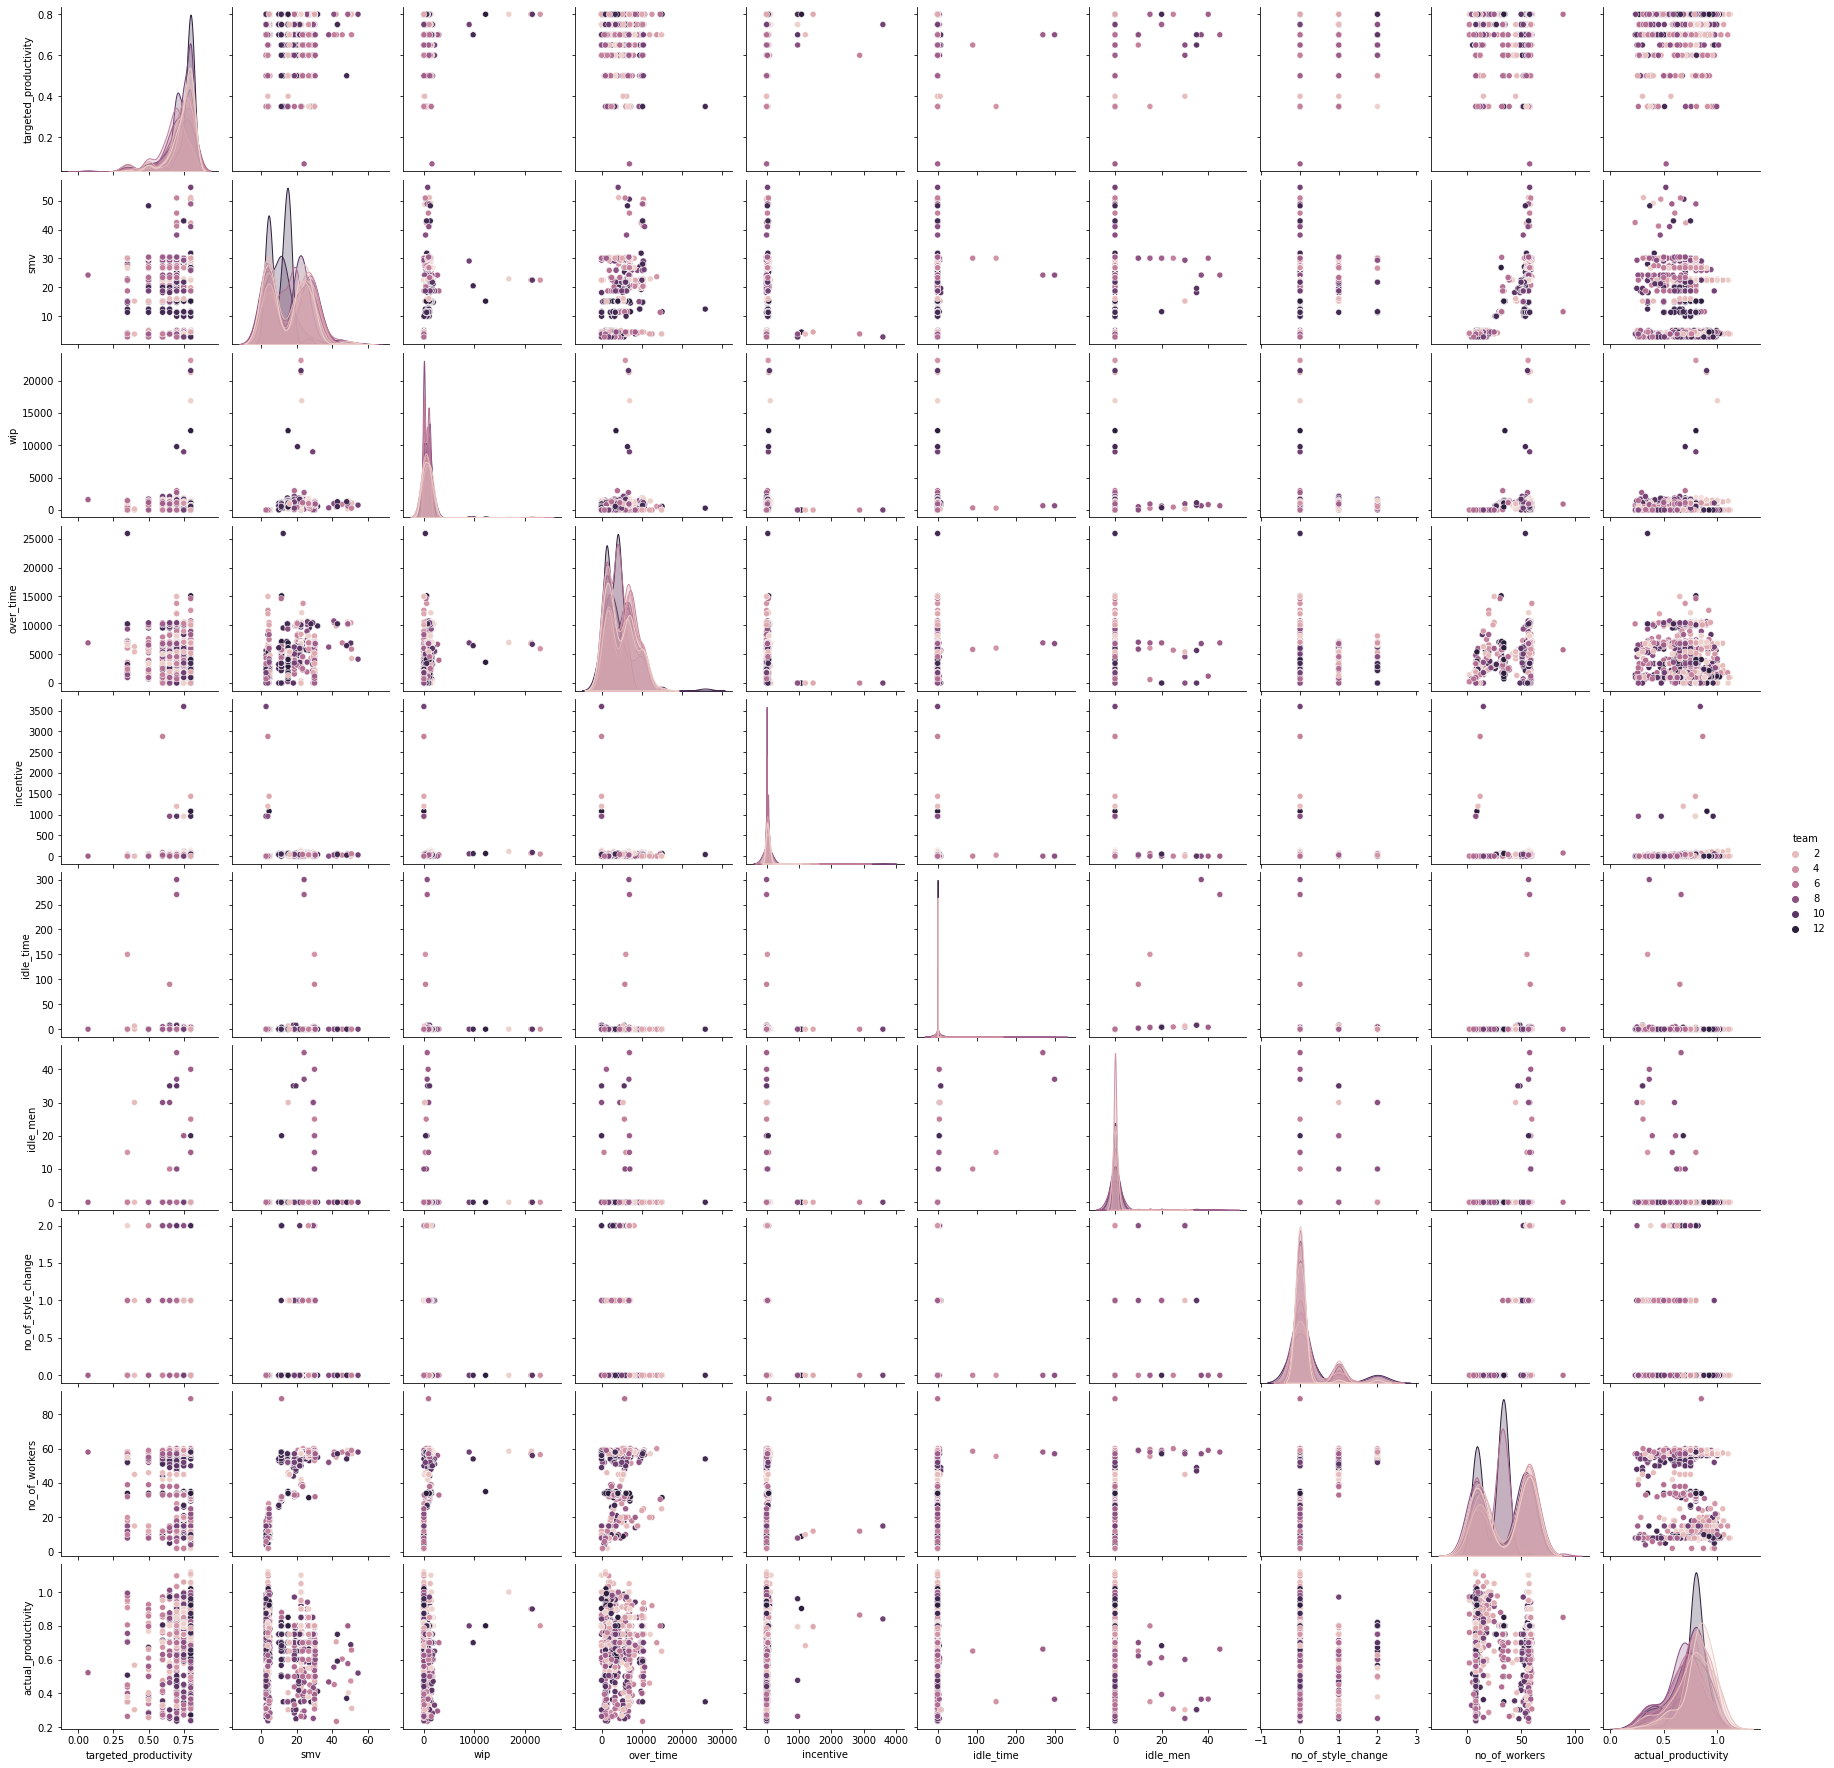

In [21]:
sns.pairplot(df, hue = "team")

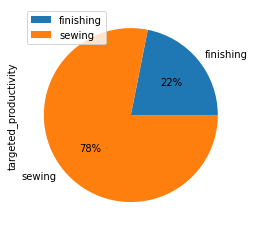

In [22]:
df.groupby(['department']).sum().plot( kind='pie', y='targeted_productivity', autopct='%1.0f%%')

In [23]:
fig = px.bar(df, x="department", y="actual_productivity", barmode="group", color="department", facet_col="quarter")
fig

### Building Machine Learning Model 

In [24]:
# Split dataset to features and target
# Our target in this model is actual_productivity

X = df.drop(columns=['date', 'actual_productivity'])
y = df['actual_productivity']

In [25]:
# Encoding categorical features

le = LabelEncoder()
cols = X.columns.tolist()
for column in cols:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column])

In [26]:
X.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,month
0,0,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,1
1,0,0,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,1
2,0,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,1
3,0,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,1
4,0,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,1


In [29]:
# Splitting the dataset to train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state= 123)

In [30]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [31]:

X_train.shape, X_test.shape

((957, 14), (240, 14))

In [32]:
X_test.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,month
156,1,0,1,11,0.80,4.15,0.0,1440,0,0.0,0,0,8.0,1
529,4,0,1,8,0.65,3.94,0.0,960,0,0.0,0,0,8.0,1
856,2,1,3,4,0.75,5.13,0.0,1920,0,0.0,0,0,8.0,0
895,3,1,0,8,0.70,29.40,1094.0,6840,40,0.0,0,2,57.0,0
35,0,0,1,10,0.70,4.15,0.0,960,0,0.0,0,0,8.0,1


In [33]:
# Building a Linear regression model 
lr = LinearRegression()

lr.fit(X_train_sc, y_train)

LinearRegression()

In [34]:
linear_pred = lr.predict(X_test_sc)

In [35]:
# Regression report 
Adj_r2 = 1 - (1-r2_score(y_test, linear_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R Squared:",r2_score(y_test, linear_pred))
print("MSE:",mean_squared_error(y_test, linear_pred))
print("MAE:",mean_absolute_error(y_test, linear_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, linear_pred)))
print("Adjusted R Squared:",Adj_r2)

R Squared: 0.2962997748221138
MSE: 0.01984775574368193
MAE: 0.10992045562477984
RMSE: 0.14088206324327426
Adjusted R Squared: 0.25251398303326744


In [36]:
# Building a SVR model 

svr = SVR()
svr.fit(X_train_sc,y_train)
preds_svr = svr.predict(X_test_sc)


# Look at svr report
Adj_r2 = 1 - (1-r2_score(y_test, preds_svr)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R Squared:",r2_score(y_test, preds_svr))
print("MSE:",mean_squared_error(y_test, preds_svr))
print("MAE:",mean_absolute_error(y_test, preds_svr))
print("RMSE:",np.sqrt(mean_squared_error(y_test, preds_svr)))
print("Adjusted R Squared:",Adj_r2)

R Squared: 0.33244903556361394
MSE: 0.018828171449346096
MAE: 0.09764520123502002
RMSE: 0.13721578425730072
Adjusted R Squared: 0.2909125311097944


### Improving ML Model Using Grid Search

In [37]:
# retrain Linear model using gid search

param_grid = {
                'fit_intercept':[True,False], 
                'normalize':[True,False], 
                }

gs = GridSearchCV(LinearRegression(), param_grid=param_grid, cv=10, refit='neg_mean_squared_error')

In [38]:
gs.fit(X_train_sc, y_train)
results = gs.cv_results_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(Standar

In [39]:
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)

best params: LinearRegression(normalize=False)
best params: {'fit_intercept': True, 'normalize': False}
best score: 0.2557426618307452


In [40]:
linear_pred=gs.predict(X_test_sc)

In [41]:
# Regression report 
Adj_r2 = 1 - (1-r2_score(y_test, linear_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R Squared:",r2_score(y_test, linear_pred))
print("MSE:",mean_squared_error(y_test, linear_pred))
print("MAE:",mean_absolute_error(y_test, linear_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, linear_pred)))
print("Adjusted R Squared:",Adj_r2)

R Squared: 0.2962997748221138
MSE: 0.01984775574368193
MAE: 0.10992045562477984
RMSE: 0.14088206324327426
Adjusted R Squared: 0.25251398303326744


In [42]:
# retrain SVR model using gid search

param = {
         'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
         'C' : [1,10,1],
         }

svr_grids = GridSearchCV(SVR(),param, cv=10, refit='neg_mean_squared_error')

In [43]:
svr_grids.fit(X_train_sc,y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [1, 10, 1],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             refit='neg_mean_squared_error')

In [44]:
print("best params: " + str(svr_grids.best_estimator_))
print("best params: " + str(svr_grids.best_params_))
print('best score:', svr_grids.best_score_)

best params: SVR(C=1)
best params: {'C': 1, 'kernel': 'rbf'}
best score: 0.3702514813147895


In [45]:
preds_svr = svr_grids.predict(X_test_sc)
# Look at svr report

Adj_r2 = 1 - (1-r2_score(y_test, preds_svr)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R Squared:",r2_score(y_test, preds_svr))
print("MSE:",mean_squared_error(y_test, preds_svr))
print("MAE:",mean_absolute_error(y_test, preds_svr))
print("RMSE:",np.sqrt(mean_squared_error(y_test, preds_svr)))
print("Adjusted R Squared:",Adj_r2)

R Squared: 0.33244903556361394
MSE: 0.018828171449346096
MAE: 0.09764520123502002
RMSE: 0.13721578425730072
Adjusted R Squared: 0.2909125311097944


### **Since SVR Model gives me better result I will deploy it**

# Save ML Model, Scaler and Encoder

In [46]:
# save the model, scaler and the encoder 

pickle.dump(le, open('encoder.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl','wb'))
pickle.dump(svr_grids, open('model.pkl','wb'))

In [47]:
# Load just to check that model, scaler and encoder is working
encoder = pickle.load(open('encoder.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))